In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np

In [80]:
def get_alexa_rank(url):
    #extract second level domain
    domain = url.split('.')[-2] + '.' + url.split('.')[-1]
    if domain[-1] == '/':
        domain = domain[0:-1]
    URL = "https://www.alexa.com/siteinfo/" + domain
    
    #make request
    response = requests.get(URL)
    print("Queried Alexa: ", response.url)
    if response.status_code!=200:
        print("!=200")
        return None
    
    #parse results
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #extract global alexa rank
    rank_int = None
    rank_cont = soup.find('p', class_='big data')
    if rank_cont!=None:
        rank_int = int(rank_cont.text.split(' ')[1].rstrip().replace(',',''))
    return rank_int


#countries with top-3 alexa ranks for the website
def get_top_alexa_ranks(url):
    #extract second level domain
    domain = url.split('.')[-2] + '.' + url.split('.')[-1]
    if domain[-1] == '/':
        domain = domain[0:-1]
    URL = "https://www.alexa.com/siteinfo/" + domain
    #make request
    try:
        response = requests.get(URL)
    except:
        print("connection error")
        return None
    print("Queried Alexa: ", response.url)
    if response.status_code!=200:
        print("!=200")
        return None  
    #parse results
    soup = BeautifulSoup(response.text, 'html.parser')
    ranks_res = []
    
    try:
        ranks_geo = soup.find('div', class_="ADropdown coutryRank outer").find_all('li')
    except:
        #alexa does not return any "geo" rank for the website
        return []
    
    for x in ranks_geo:
        if "data-value" in str(x):
            rank = int(x.text.split()[-1][1:].replace(',',''))
            country = x.text.replace(x.text.split()[0],'').replace(x.text.split()[-1],'')
            ranks_res.append({'url':url, 'country':country, 'rank':rank})
    return ranks_res

In [8]:
get_alexa_rank("https://www.crazygames.com")

Queried Alexa:  https://www.alexa.com/siteinfo/crazygames.com


2100

In [63]:
get_top_alexa_ranks("https://www.crazygames.com")

Queried Alexa:  https://www.alexa.com/siteinfo/crazygames.com


[{'country': ' India ', 'rank': 852, 'url': 'https://www.crazygames.com'},
 {'country': ' United States ',
  'rank': 3229,
  'url': 'https://www.crazygames.com'},
 {'country': ' United Kingdom ',
  'rank': 739,
  'url': 'https://www.crazygames.com'}]

### Annotate xyz's results (1248 marketplaces)

In [11]:
# !touch mp_alexa_ranked.txt

In [4]:
URLS = pd.read_excel("./for_alexa.xlsx", header=None)[0].values.tolist()

done = set()
LONG_SLEEP = 5.0
SHORT_SLEEP = 0.1

with open("mp_alexa_ranked.txt") as fin:
    for line in fin:
        done.add(line.split(' ')[0])

while True:
    for url in URLS:
        if url in done:
            #already in the set
            print("Skipping (already in set). Resuming soon")
            time.sleep(SHORT_SLEEP)
            continue
        alexa_rank = get_alexa_rank(url)
        if alexa_rank!=None:
            #print results
            print({'url':url, 'alexa_rank':alexa_rank})
            #write results to file
            with open("mp_alexa_ranked.txt",'a') as fout:
                fout.write(url + ' ' + str(alexa_rank) + '\n')
            done.add(url)
        time.sleep(LONG_SLEEP)

Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/dotio.games
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/kinderwebgames.com
Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Queried Alexa:  https://www.alexa.com/siteinfo/free-games.hu
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in s

Queried Alexa:  https://www.alexa.com/siteinfo/free-browsergames.de
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/freegamesonline.dk
Queried Alexa:  https://www.alexa.com/siteinfo/co.uk
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/free-web-games.info
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/gamebytetv.com
!=200
Skipping (already in s

Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/web.tr
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/kilo-game.net
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/giochi.io
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/gryio.pl
Queried Alexa:  https

Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/123juegos.es
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Queried Alexa:  https://www.alexa.com/siteinfo/321spielen.de
Queried Alexa:  https://www.alexa.com/siteinfo/8kz.com
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Queried Alexa:  https://www.alexa.com/siteinfo/asobuyo.net
Skipping (already in set). Resuming soon
Queried Alexa:  

Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.pe
Queried Alexa:  https://www.alexa.com/siteinfo/pankasyno17.com
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/co.id
Queried Alexa:  https://www.alexa.com/siteinfo/permainanhacked.com
Queried Alexa:  https://www.alexa.com/siteinfo/permainanmemasak100.com
Queried Alexa:  https://www.alexa.com/siteinfo/permainan-perang.com
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/pomu.nl
Skipping (already in se

KeyboardInterrupt: 

In [5]:
!cat mp_alexa_ranked.txt

addictinggames.com 10803
addictinggames.com 10803
browsergameshub.com 4491398
de.gamepost.com 492127
ea.pogo.com 6049
epicport.com 1107278
friv.games 959604
games.everythingzoomer.com 304623
games.pilotonline.com 53347
games.sixtyandme.com 95758
impossiblegame.org 1677240
iogamesbx.com 2808105
jigsawpuzzles.io 119062
webgameapp.com 122390
www.andkon.com 88346
www.armorgames.com 6348
www.bigmoneyarcade.com 805312
www.bridgebase.com 13323
www.cardgamesolitaire.com 281649
www.cheater.fun 73562
www.freegame.tw 1529896
www.freegames.ws 241089
www.freemmorpglist.com 9992011
www.gameflare.com 43834
www.geoguessr.com 7044
www.i-gamer.net 56959
www.io-games.co 1688357
www.iogames.us 2945620
www.jatekokxl.hu 74770
www.matrakoyun.com 1079663
www.onlinematching.games 1286364
www.owlieboo.com 300226
www.solitaire-web-app.com 208192
www.typinggames.zone 68573
www.webgames.cz 70206
www.wordgames.com 287494
www.wowescape.com 138288
1000webgames.com 140575
a99.io 1248651
absolutist.com 523838
agar.game

In [34]:
df_alexa = pd.read_csv("mp_alexa_ranked.txt", sep=' ', header=None, names=['website','rank'])
df_alexa

,website,rank
0,addictinggames.com,10803
1,addictinggames.com,10803
2,browsergameshub.com,4491398
3,de.gamepost.com,492127
4,ea.pogo.com,6049
...,...,...
907,www.mindgames.com,83754
908,www.crazygames.ro,10580280
909,pt.vitalitygames.com,111253
910,addictinggames.com,10864


/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


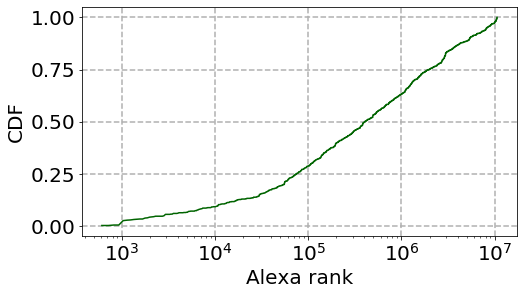

In [24]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', size=20)
plt.rcParams["figure.figsize"] = (7.5,4.5)

alexa_ranks = []
with open("mp_alexa_ranked.txt") as fin:
    for line in fin:
        curr_rank = int(line[0:-1].split(' ')[1])
        if curr_rank>500: #all below 500 are mistakes
            alexa_ranks.append(curr_rank)
    
#IMP !! Labels are swapped here!
num_bins = 100000


counts, bin_edges = np.histogram (alexa_ranks, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
a, = plt.plot (bin_edges[1:], cdf/cdf[-1], lw=1.5, color='darkgreen', linestyle='-')

plt.xlabel("Alexa rank")
plt.ylabel("CDF")
# plt.xticks([0,0.1,0.2,0.3,0.4])
# plt.xlim([0,0.45])
# plt.legend(handles=[a, b, c], loc=4, frameon=False)
plt.grid(lw=1.5, linestyle='--')
plt.xscale('log')
plt.tight_layout()
plt.savefig("cdf_alexa.pdf")
plt.show()


In [39]:
df_alexa.sort_values(by='rank').tail(30)

,website,rank
334,gombis.pl,9239027
479,www.betstore.at,9290714
817,www.hierspielen.com,9324105
721,korkuncoyunlar.net,9695008
697,in.game24.ru,9783493
808,www.gamepix.fr,9924031
446,thagames.ru,9959067
786,www.bestdailygames.com,9969889
770,ucretsizonlineoyunlar.com,9988343
22,www.freemmorpglist.com,9992011


### Annotate xyz's results (1248 marketplaces) with ranks of top-3 countries


In [78]:
!touch mp_alexa_ranked_top3.txt

In [81]:
URLS = pd.read_excel("./for_alexa.xlsx", header=None)[0].values.tolist()

done = set()
LONG_SLEEP = 5.0
SHORT_SLEEP = 0.1

with open("mp_alexa_ranked_top3.txt") as fin:
    for line in fin:
        done.add(line.split(' ')[0])

while True:
    for url in URLS:
        if url in done:
            #already in the set
            print("Skipping (already in set). Resuming soon")
            time.sleep(SHORT_SLEEP)
            continue
        top3info = get_top_alexa_ranks(url)
        
        if top3info!=None and top3info!=[]:
            print(top3info)
            for info in top3info:
                with open("mp_alexa_ranked_top3.txt",'a') as fout:
                    fout.write(url + '\t' + info['country'] + '\t' + str(info['rank']) + '\n')
                done.add(url)
        else:
            print("Error", url)
        time.sleep(LONG_SLEEP)

Queried Alexa:  https://www.alexa.com/siteinfo/addictinggames.com
[{'url': 'addictinggames.com', 'country': ' United States ', 'rank': 5277}, {'url': 'addictinggames.com', 'country': ' India ', 'rank': 20216}, {'url': 'addictinggames.com', 'country': ' Egypt ', 'rank': 2908}]
Queried Alexa:  https://www.alexa.com/siteinfo/browsergameshub.com
Error browsergameshub.com
Queried Alexa:  https://www.alexa.com/siteinfo/gamepost.com
Error de.gamepost.com
Queried Alexa:  https://www.alexa.com/siteinfo/dotio.games
Error dotio.games
Queried Alexa:  https://www.alexa.com/siteinfo/pogo.com
[{'url': 'ea.pogo.com', 'country': ' United States ', 'rank': 1173}, {'url': 'ea.pogo.com', 'country': ' Canada ', 'rank': 5098}, {'url': 'ea.pogo.com', 'country': ' Trinidad and Tobago ', 'rank': 459}]
Queried Alexa:  https://www.alexa.com/siteinfo/epicport.com
Error epicport.com
Queried Alexa:  https://www.alexa.com/siteinfo/kinderwebgames.com
Error free.kinderwebgames.com
Queried Alexa:  https://www.alexa.com

Queried Alexa:  https://www.alexa.com/siteinfo/browsermmorpg.com
Error browsermmorpg.com
Queried Alexa:  https://www.alexa.com/siteinfo/cardgames.io
[{'url': 'cardgames.io', 'country': ' United States ', 'rank': 3679}, {'url': 'cardgames.io', 'country': ' Canada ', 'rank': 3621}, {'url': 'cardgames.io', 'country': ' India ', 'rank': 17400}]
Queried Alexa:  https://www.alexa.com/siteinfo/caygames.com
Error caygames.com
Queried Alexa:  https://www.alexa.com/siteinfo/clavejuegos.com
Error clavejuegos.com
Queried Alexa:  https://www.alexa.com/siteinfo/cool-io.games
Error cool-io.games
Queried Alexa:  https://www.alexa.com/siteinfo/upjers.com
[{'url': 'de.upjers.com', 'country': ' Germany ', 'rank': 4450}, {'url': 'de.upjers.com', 'country': ' Algeria ', 'rank': 4054}, {'url': 'de.upjers.com', 'country': ' Russia ', 'rank': 37174}]
Queried Alexa:  https://www.alexa.com/siteinfo/y8.com
[{'url': 'de.y8.com', 'country': ' Thailand ', 'rank': 36}, {'url': 'de.y8.com', 'country': ' Philippines '

Queried Alexa:  https://www.alexa.com/siteinfo/iogames0.com
Error iogames0.com
Queried Alexa:  https://www.alexa.com/siteinfo/iogamescom.com
Error iogamescom.com
Queried Alexa:  https://www.alexa.com/siteinfo/iogames-space.com
Error iogames-space.com
Queried Alexa:  https://www.alexa.com/siteinfo/iogamez.net
Error iogamez.net
Queried Alexa:  https://www.alexa.com/siteinfo/ioiogames.com
Error ioiogames.com
Queried Alexa:  https://www.alexa.com/siteinfo/ioxgames.com
Error ioxgames.com
Queried Alexa:  https://www.alexa.com/siteinfo/crazygames.com
[{'url': 'it.crazygames.com', 'country': ' India ', 'rank': 852}, {'url': 'it.crazygames.com', 'country': ' United States ', 'rank': 3229}, {'url': 'it.crazygames.com', 'country': ' United Kingdom ', 'rank': 739}]
Queried Alexa:  https://www.alexa.com/siteinfo/y8.com
[{'url': 'it.y8.com', 'country': ' Thailand ', 'rank': 36}, {'url': 'it.y8.com', 'country': ' Philippines ', 'rank': 47}, {'url': 'it.y8.com', 'country': ' Venezuela ', 'rank': 75}]


Queried Alexa:  https://www.alexa.com/siteinfo/titotu.io
[{'url': 'titotu.io', 'country': ' United States ', 'rank': 119193}, {'url': 'titotu.io', 'country': ' India ', 'rank': 94870}, {'url': 'titotu.io', 'country': ' Turkey ', 'rank': 41826}]
Queried Alexa:  https://www.alexa.com/siteinfo/topwebgames.com
Error topwebgames.com
Queried Alexa:  https://www.alexa.com/siteinfo/yupi.io
[{'url': 'tr.yupi.io', 'country': ' Turkey ', 'rank': 26565}]
Queried Alexa:  https://www.alexa.com/siteinfo/webgames24.com
Error webgames24.com
Queried Alexa:  https://www.alexa.com/siteinfo/wellgames.com
[{'url': 'wellgames.com', 'country': ' United States ', 'rank': 66106}, {'url': 'wellgames.com', 'country': ' Russia ', 'rank': 23098}]
Queried Alexa:  https://www.alexa.com/siteinfo/1001juegos.com
[{'url': 'www.1001juegos.com', 'country': ' Venezuela ', 'rank': 266}, {'url': 'www.1001juegos.com', 'country': ' Mexico ', 'rank': 854}, {'url': 'www.1001juegos.com', 'country': ' Argentina ', 'rank': 720}]
Que

Queried Alexa:  https://www.alexa.com/siteinfo/friv.com
[{'url': 'www.friv.com', 'country': ' Brazil ', 'rank': 274}, {'url': 'www.friv.com', 'country': ' Argentina ', 'rank': 193}, {'url': 'www.friv.com', 'country': ' Mexico ', 'rank': 483}]
Queried Alexa:  https://www.alexa.com/siteinfo/funbrain.com
[{'url': 'www.funbrain.com', 'country': ' United States ', 'rank': 15602}, {'url': 'www.funbrain.com', 'country': ' India ', 'rank': 48805}, {'url': 'www.funbrain.com', 'country': ' Canada ', 'rank': 17452}]
Queried Alexa:  https://www.alexa.com/siteinfo/funnygames.be
Error www.funnygames.be
Queried Alexa:  https://www.alexa.com/siteinfo/funnygames.nl
[{'url': 'www.funnygames.nl', 'country': ' United States ', 'rank': 56306}, {'url': 'www.funnygames.nl', 'country': ' Turkey ', 'rank': 61437}]
Queried Alexa:  https://www.alexa.com/siteinfo/funnygames.org
[{'url': 'www.funnygames.org', 'country': ' Argentina ', 'rank': 2128}]
Queried Alexa:  https://www.alexa.com/siteinfo/fupa.com
Error www

Queried Alexa:  https://www.alexa.com/siteinfo/kiloo.com
[{'url': 'www.kiloo.com', 'country': ' India ', 'rank': 14300}, {'url': 'www.kiloo.com', 'country': ' Azerbaijan ', 'rank': 1062}, {'url': 'www.kiloo.com', 'country': ' United States ', 'rank': 44719}]
Queried Alexa:  https://www.alexa.com/siteinfo/king.com
[{'url': 'www.king.com', 'country': ' United States ', 'rank': 19036}, {'url': 'www.king.com', 'country': ' Romania ', 'rank': 831}, {'url': 'www.king.com', 'country': ' Japan ', 'rank': 11653}]
Queried Alexa:  https://www.alexa.com/siteinfo/kongregate.com
[{'url': 'www.kongregate.com', 'country': ' United States ', 'rank': 1484}, {'url': 'www.kongregate.com', 'country': ' Netherlands ', 'rank': 124}, {'url': 'www.kongregate.com', 'country': ' United Kingdom ', 'rank': 577}]
Queried Alexa:  https://www.alexa.com/siteinfo/mahjong.com
[{'url': 'www.mahjong.com', 'country': ' United States ', 'rank': 72864}, {'url': 'www.mahjong.com', 'country': ' Ukraine ', 'rank': 27862}]
Queri

Queried Alexa:  https://www.alexa.com/siteinfo/smartgameslive.com
Error www.smartgameslive.com
Queried Alexa:  https://www.alexa.com/siteinfo/snesfun.com
Error www.snesfun.com
Queried Alexa:  https://www.alexa.com/siteinfo/sonicgames.com
Error www.sonicgames.com
Queried Alexa:  https://www.alexa.com/siteinfo/speeleiland.nl
[{'url': 'www.speeleiland.nl', 'country': ' United States ', 'rank': 69034}]
Queried Alexa:  https://www.alexa.com/siteinfo/speelspelletjes.nl
Error www.speelspelletjes.nl
Queried Alexa:  https://www.alexa.com/siteinfo/spel.nl
Error www.spel.nl
Queried Alexa:  https://www.alexa.com/siteinfo/spelletjes.nl
[{'url': 'www.spelletjes.nl', 'country': ' Netherlands ', 'rank': 1177}]
Queried Alexa:  https://www.alexa.com/siteinfo/spielaffe.de
[{'url': 'www.spielaffe.de', 'country': ' Germany ', 'rank': 1097}, {'url': 'www.spielaffe.de', 'country': ' United States ', 'rank': 27161}, {'url': 'www.spielaffe.de', 'country': ' Canada ', 'rank': 28773}]
Queried Alexa:  https://www

Queried Alexa:  https://www.alexa.com/siteinfo/igames9.com
Error es.igames9.com
Queried Alexa:  https://www.alexa.com/siteinfo/upjers.com
[{'url': 'es.upjers.com', 'country': ' Germany ', 'rank': 4450}, {'url': 'es.upjers.com', 'country': ' Algeria ', 'rank': 4054}, {'url': 'es.upjers.com', 'country': ' Russia ', 'rank': 37174}]
Queried Alexa:  https://www.alexa.com/siteinfo/euro-jeux.com
Error euro-jeux.com
Queried Alexa:  https://www.alexa.com/siteinfo/falconline.net
Error falconline.net
Queried Alexa:  https://www.alexa.com/siteinfo/fishz.io
Error fishz.io
Queried Alexa:  https://www.alexa.com/siteinfo/flashdozor.ru
[{'url': 'flashdozor.ru', 'country': ' Russia ', 'rank': 1338}, {'url': 'flashdozor.ru', 'country': ' Ukraine ', 'rank': 2454}, {'url': 'flashdozor.ru', 'country': ' Kazakhstan ', 'rank': 1586}]
Queried Alexa:  https://www.alexa.com/siteinfo/gamigo.com
[{'url': 'fr.gamigo.com', 'country': ' Egypt ', 'rank': 3027}, {'url': 'fr.gamigo.com', 'country': ' India ', 'rank': 25

Queried Alexa:  https://www.alexa.com/siteinfo/zazaplay.com
Error in.zazaplay.com
Queried Alexa:  https://www.alexa.com/siteinfo/zxgame9.com
Error in.zxgame9.com
Queried Alexa:  https://www.alexa.com/siteinfo/infiplay.com
[{'url': 'infiplay.com', 'country': ' Russia ', 'rank': 15344}, {'url': 'infiplay.com', 'country': ' Belarus ', 'rank': 3386}, {'url': 'infiplay.com', 'country': ' Ukraine ', 'rank': 39270}]
Queried Alexa:  https://www.alexa.com/siteinfo/io-diep.ru
Error io-diep.ru
Queried Alexa:  https://www.alexa.com/siteinfo/ioigru.net
Error ioigru.net
Queried Alexa:  https://www.alexa.com/siteinfo/iolanguage.com
Error iolanguage.com
Queried Alexa:  https://www.alexa.com/siteinfo/goobix.com
Error it.goobix.com
Queried Alexa:  https://www.alexa.com/siteinfo/yupi.io
[{'url': 'it.yupi.io', 'country': ' Turkey ', 'rank': 26565}]
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Error itsmygame.com.ua
Queried Alexa:  https://www.alexa.com/siteinfo/y8.com
[{'url': 'ja.y8.com', 'count

Queried Alexa:  https://www.alexa.com/siteinfo/onlineigry.net
[{'url': 'onlineigry.net', 'country': ' Russia ', 'rank': 14246}]
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Error openupgames.com.ua
Queried Alexa:  https://www.alexa.com/siteinfo/oyun.io
[{'url': 'oyun.io', 'country': ' Turkey ', 'rank': 11744}]
Queried Alexa:  https://www.alexa.com/siteinfo/oyun101.com
Error oyun101.com
Queried Alexa:  https://www.alexa.com/siteinfo/321freegames.com
Error oyunlar.321freegames.com
Queried Alexa:  https://www.alexa.com/siteinfo/oyunoyna33.com
[{'url': 'oyunoyna33.com', 'country': ' Turkey ', 'rank': 49404}]
Queried Alexa:  https://www.alexa.com/siteinfo/pacanele-online.com
Error pacanele-online.com
Queried Alexa:  https://www.alexa.com/siteinfo/p-game.jp
[{'url': 'p-game.jp', 'country': ' Japan ', 'rank': 18081}]
Queried Alexa:  https://www.alexa.com/siteinfo/pio-puf.ru
Error pio-puf.ru
Queried Alexa:  https://www.alexa.com/siteinfo/igames9.com
Error pk.igames9.com
Queried Alexa:

Queried Alexa:  https://www.alexa.com/siteinfo/1001giochi.it
[{'url': 'www.1001giochi.it', 'country': ' Italy ', 'rank': 1367}]
Queried Alexa:  https://www.alexa.com/siteinfo/1001jeux.fr
[{'url': 'www.1001jeux.fr', 'country': ' France ', 'rank': 275}, {'url': 'www.1001jeux.fr', 'country': ' Algeria ', 'rank': 1806}, {'url': 'www.1001jeux.fr', 'country': ' Madagascar ', 'rank': 163}]
Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Error www.1001jogos.com.br
Queried Alexa:  https://www.alexa.com/siteinfo/1001jogos.pt
[{'url': 'www.1001jogos.pt', 'country': ' Portugal ', 'rank': 130}]
Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Error www.1001jogosonline.com.br
Queried Alexa:  https://www.alexa.com/siteinfo/1001oyun.com
[{'url': 'www.1001oyun.com', 'country': ' Azerbaijan ', 'rank': 209}, {'url': 'www.1001oyun.com', 'country': ' Turkey ', 'rank': 385}]
Queried Alexa:  https://www.alexa.com/siteinfo/1001spellen.nl
Error www.1001spellen.nl
Queried Alexa:  https://www.alexa.co

Queried Alexa:  https://www.alexa.com/siteinfo/gamespark.jp
[{'url': 'www.gamespark.jp', 'country': ' Japan ', 'rank': 910}]
Queried Alexa:  https://www.alexa.com/siteinfo/gamesparkles.com
Error www.gamesparkles.com
Queried Alexa:  https://www.alexa.com/siteinfo/gamestough.com
Error www.gamestough.com
Queried Alexa:  https://www.alexa.com/siteinfo/game-tm.com
Error www.game-tm.com
Queried Alexa:  https://www.alexa.com/siteinfo/gaminator.com
Error www.gaminator.com
Queried Alexa:  https://www.alexa.com/siteinfo/giercownia.pl
Error www.giercownia.pl
Queried Alexa:  https://www.alexa.com/siteinfo/gierkionline.pl
Error www.gierkionline.pl
Queried Alexa:  https://www.alexa.com/siteinfo/giochi123.net
Error www.giochi123.net
Queried Alexa:  https://www.alexa.com/siteinfo/giochiandgiochi.com
Error www.giochiandgiochi.com
Queried Alexa:  https://www.alexa.com/siteinfo/giochionlineperbambini.com
Error www.giochionlineperbambini.com
Queried Alexa:  https://www.alexa.com/siteinfo/co.id
Error www.g

Queried Alexa:  https://www.alexa.com/siteinfo/juegosjuegos.com
[{'url': 'www.juegosjuegos.com', 'country': ' Argentina ', 'rank': 404}, {'url': 'www.juegosjuegos.com', 'country': ' Spain ', 'rank': 2012}, {'url': 'www.juegosjuegos.com', 'country': ' Mexico ', 'rank': 4242}]
Queried Alexa:  https://www.alexa.com/siteinfo/juegosjuegos.ws
[{'url': 'www.juegosjuegos.ws', 'country': ' Venezuela ', 'rank': 270}, {'url': 'www.juegosjuegos.ws', 'country': ' Mexico ', 'rank': 1626}, {'url': 'www.juegosjuegos.ws', 'country': ' Colombia ', 'rank': 881}]
Queried Alexa:  https://www.alexa.com/siteinfo/juegosjuegos24.com
Error www.juegosjuegos24.com
Queried Alexa:  https://www.alexa.com/siteinfo/juegosweb.com
Error www.juegosweb.com
Queried Alexa:  https://www.alexa.com/siteinfo/kizi.link
Error www.kizi.link
Queried Alexa:  https://www.alexa.com/siteinfo/knightix.com
Error www.knightix.com
Queried Alexa:  https://www.alexa.com/siteinfo/kostenlose-browsergames.de
Error www.kostenlose-browsergames.de

Queried Alexa:  https://www.alexa.com/siteinfo/skullcrash.com
Error www.skullcrash.com
Queried Alexa:  https://www.alexa.com/siteinfo/smartjeux.com
Error www.smartjeux.com
Queried Alexa:  https://www.alexa.com/siteinfo/snokido.fr
[{'url': 'www.snokido.fr', 'country': ' Algeria ', 'rank': 2249}, {'url': 'www.snokido.fr', 'country': ' Tunisia ', 'rank': 1836}, {'url': 'www.snokido.fr', 'country': ' Madagascar ', 'rank': 428}]
Queried Alexa:  https://www.alexa.com/siteinfo/sogore.com
Error www.sogore.com
Queried Alexa:  https://www.alexa.com/siteinfo/speele.nl
Error www.speele.nl
Queried Alexa:  https://www.alexa.com/siteinfo/spelletjes.la
Error www.spelletjes.la
Queried Alexa:  https://www.alexa.com/siteinfo/spiele10.de
Error www.spiele10.de
Queried Alexa:  https://www.alexa.com/siteinfo/spiele123.com
Error www.spiele123.com
Queried Alexa:  https://www.alexa.com/siteinfo/spiele-kostenlos-online.de
[{'url': 'www.spiele-kostenlos-online.de', 'country': ' Austria ', 'rank': 195}]
Queried Al

Queried Alexa:  https://www.alexa.com/siteinfo/razzlepuzzles.com
[{'url': 'api.razzlepuzzles.com', 'country': ' India ', 'rank': 121018}]
Queried Alexa:  https://www.alexa.com/siteinfo/gamepost.com
Error ar.gamepost.com
Queried Alexa:  https://www.alexa.com/siteinfo/joy.land
[{'url': 'ar.joy.land', 'country': ' Israel ', 'rank': 6354}, {'url': 'ar.joy.land', 'country': ' Egypt ', 'rank': 28032}, {'url': 'ar.joy.land', 'country': ' Iran ', 'rank': 71143}]
Queried Alexa:  https://www.alexa.com/siteinfo/arckade.fr
Error arckade.fr
Queried Alexa:  https://www.alexa.com/siteinfo/astaza.com
Error astaza.com
Queried Alexa:  https://www.alexa.com/siteinfo/koramgame.com
[{'url': 'ath.koramgame.com', 'country': ' United States ', 'rank': 41606}, {'url': 'ath.koramgame.com', 'country': ' India ', 'rank': 132389}, {'url': 'ath.koramgame.com', 'country': ' Pakistan ', 'rank': 42825}]
Queried Alexa:  https://www.alexa.com/siteinfo/plarium.com
[{'url': 'b.plarium.com', 'country': ' United States ', '

Queried Alexa:  https://www.alexa.com/siteinfo/online.fr
[{'url': 'gaming.zone.online.fr', 'country': ' India ', 'rank': 7043}, {'url': 'gaming.zone.online.fr', 'country': ' United States ', 'rank': 26159}, {'url': 'gaming.zone.online.fr', 'country': ' Japan ', 'rank': 12185}]
Queried Alexa:  https://www.alexa.com/siteinfo/gamiplay.ru
[{'url': 'gamiplay.ru', 'country': ' Russia ', 'rank': 26662}, {'url': 'gamiplay.ru', 'country': ' Kazakhstan ', 'rank': 7216}]
Queried Alexa:  https://www.alexa.com/siteinfo/321freegames.com
Error gemuzu.321freegames.com
Queried Alexa:  https://www.alexa.com/siteinfo/ggemdol.com
Error ggemdol.com
Queried Alexa:  https://www.alexa.com/siteinfo/ginoda.io
Error ginoda.io
Queried Alexa:  https://www.alexa.com/siteinfo/gioca-gratis.it
Error gioca-gratis.it
Queried Alexa:  https://www.alexa.com/siteinfo/321freegames.com
Error giochi.321freegames.com
Queried Alexa:  https://www.alexa.com/siteinfo/gokids.ro
Error gokids.ro
Queried Alexa:  https://www.alexa.com/s

Queried Alexa:  https://www.alexa.com/siteinfo/oyunlarr.com
[{'url': 'oyunlarr.com', 'country': ' Turkey ', 'rank': 44282}]
Queried Alexa:  https://www.alexa.com/siteinfo/oyunoyna.xyz
Error oyunoyna.xyz
Queried Alexa:  https://www.alexa.com/siteinfo/pacmann.ru
[{'url': 'pacmann.ru', 'country': ' Russia ', 'rank': 78833}]
Queried Alexa:  https://www.alexa.com/siteinfo/com.pl
Error pasjanse.com.pl
Queried Alexa:  https://www.alexa.com/siteinfo/igames8.com
Error pl.www.igames8.com
Queried Alexa:  https://www.alexa.com/siteinfo/planeta42.com
Error planeta42.com
Queried Alexa:  https://www.alexa.com/siteinfo/playcell.com
[{'url': 'playcell.com', 'country': ' Turkey ', 'rank': 40616}]
Queried Alexa:  https://www.alexa.com/siteinfo/playminigames.ru
[{'url': 'playminigames.ru', 'country': ' Russia ', 'rank': 8994}, {'url': 'playminigames.ru', 'country': ' Ukraine ', 'rank': 12084}, {'url': 'playminigames.ru', 'country': ' Georgia ', 'rank': 2386}]
Queried Alexa:  https://www.alexa.com/siteinfo

Queried Alexa:  https://www.alexa.com/siteinfo/billardonline.org
Error www.billardonline.org
Queried Alexa:  https://www.alexa.com/siteinfo/billions-bet.com
Error www.billions-bet.com
Queried Alexa:  https://www.alexa.com/siteinfo/bnnat.net
[{'url': 'www.bnnat.net', 'country': ' Egypt ', 'rank': 10524}]
Queried Alexa:  https://www.alexa.com/siteinfo/browsergamerank.com
Error www.browsergamerank.com
Queried Alexa:  https://www.alexa.com/siteinfo/classicgamesarcade.com
Error www.classicgamesarcade.com
Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Error www.clubedojogo.com.br
Queried Alexa:  https://www.alexa.com/siteinfo/coolmath4kids.com
[{'url': 'www.coolmath4kids.com', 'country': ' United States ', 'rank': 69278}]
Queried Alexa:  https://www.alexa.com/siteinfo/crazygiochi.com
Error www.crazygiochi.com
Queried Alexa:  https://www.alexa.com/siteinfo/crocastuce.fr
Error www.crocastuce.fr
Queried Alexa:  https://www.alexa.com/siteinfo/dafabet.com
[{'url': 'www.dafabet.com', 'count

Queried Alexa:  https://www.alexa.com/siteinfo/jeuxkiffe.com
Error www.jeuxkiffe.com
Queried Alexa:  https://www.alexa.com/siteinfo/jeuxmmorpg.com
Error www.jeuxmmorpg.com
Queried Alexa:  https://www.alexa.com/siteinfo/jeux-navigateur.org
Error www.jeux-navigateur.org
Queried Alexa:  https://www.alexa.com/siteinfo/jeuxpompiers.com
Error www.jeuxpompiers.com
Queried Alexa:  https://www.alexa.com/siteinfo/jeuxpourtoutpetit.com
Error www.jeuxpourtoutpetit.com
Queried Alexa:  https://www.alexa.com/siteinfo/jewelquest.com
Error www.jewelquest.com
Queried Alexa:  https://www.alexa.com/siteinfo/joaca-jocuri.com
Error www.joaca-jocuri.com
Queried Alexa:  https://www.alexa.com/siteinfo/joculete.com
Error www.joculete.com
Queried Alexa:  https://www.alexa.com/siteinfo/jocuri.co
Error www.jocuri.co
Queried Alexa:  https://www.alexa.com/siteinfo/jocuri-10.com
Error www.jocuri-10.com
Queried Alexa:  https://www.alexa.com/siteinfo/jocuriaparate-gratis.com
Error www.jocuriaparate-gratis.com
Queried A

Queried Alexa:  https://www.alexa.com/siteinfo/phyfun.com
Error www.phyfun.com
Queried Alexa:  https://www.alexa.com/siteinfo/physicsgames.net
Error www.physicsgames.net
Queried Alexa:  https://www.alexa.com/siteinfo/piplex.com
Error www.piplex.com
Queried Alexa:  https://www.alexa.com/siteinfo/playduck.com
Error www.playduck.com
Queried Alexa:  https://www.alexa.com/siteinfo/pomu.fr
Error www.pomu.fr
Queried Alexa:  https://www.alexa.com/siteinfo/puttix.com
Error www.puttix.com
Queried Alexa:  https://www.alexa.com/siteinfo/sarzamingames.ir
Error www.sarzamingames.ir
Queried Alexa:  https://www.alexa.com/siteinfo/sempreonline.net
Error www.sempreonline.net
Queried Alexa:  https://www.alexa.com/siteinfo/skoroyun.net
[{'url': 'www.skoroyun.net', 'country': ' Turkey ', 'rank': 32402}]
Queried Alexa:  https://www.alexa.com/siteinfo/solitaire-gratuits.com
Error www.solitaire-gratuits.com
Queried Alexa:  https://www.alexa.com/siteinfo/solitalian.it
Error www.solitalian.it
Queried Alexa:  ht

Queried Alexa:  https://www.alexa.com/siteinfo/owlieboo.com
Error www.owlieboo.com
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/a99.io
Error a99.io
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/agar.games
Error agar.games
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/bestfreeonlinegames.com
Error bestfreeonlinegames.com
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/browsermmorpg.com
Error browsermmorpg.com
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/caygames.com
Error caygames.com
Queried Alexa:

Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/dailygames.com
Error www.dailygames.com
Queried Alexa:  https://www.alexa.com/siteinfo/elkspel.nl
Error www.elkspel.nl
Queried Alexa:  https://www.alexa.com/siteinfo/f2p.com
Error www.f2p.com
Queried Alexa:  https://www.alexa.com/siteinfo/com.hk
Error www.flashgame.com.hk
Queried Alexa:  https://www.alexa.com/siteinfo/flash-games.fr
Error www.flash-games.fr
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/freearcade.com
Error www.freearcade.com
Queried Alexa:  https://www.alexa.com/siteinfo/free-browsergames.de
Error www.free-browsergames.de
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/freegamesonline.dk
Error www.freegamesonline.dk
Queried Alexa:  https://www.alexa.com/siteinfo/co.uk
Error www.fre

Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/17de6p.tw
Error 17de6p.tw
Queried Alexa:  https://www.alexa.com/siteinfo/21yelh.pw
Error 21yelh.pw
Queried Alexa:  https://www.alexa.com/siteinfo/6spiele.de
Error 6spiele.de
Queried Alexa:  https://www.alexa.com/siteinfo/8imciv.pw
Error 8imciv.pw
Queried Alexa:  https://www.alexa.com/siteinfo/ab9lga.tw
Error ab9lga.tw
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/flash-igri.com
Error barbie-igri.flash-igri.com
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/igames9.com
!=200
Error bd.igames9.com
Queried Alexa:  https://www.alexa.com/siteinfo/itsmygame.org
Error bn.itsmygame.org
Queried Alexa:  https://www.alexa.com/siteinfo/kostenlos-online-spielen.com
Error cdn.kostenlos-online-spielen.com
Skipping (already in set). Resuming soon
Skippin

Queried Alexa:  https://www.alexa.com/siteinfo/jocuriaparate.eu
Error jocuriaparate.eu
Queried Alexa:  https://www.alexa.com/siteinfo/jocuri-aparate-pacanele.com
Error jocuri-aparate-pacanele.com
Queried Alexa:  https://www.alexa.com/siteinfo/jocuridepacanele.ro
Error jocuridepacanele.ro
Queried Alexa:  https://www.alexa.com/siteinfo/jocuri-online-copii.ro
Error jocuri-online-copii.ro
Queried Alexa:  https://www.alexa.com/siteinfo/jocuri-pacanele.com
Error jocuri-pacanele.com
Queried Alexa:  https://www.alexa.com/siteinfo/jogos.io
Error jogos.io
Queried Alexa:  https://www.alexa.com/siteinfo/jogos360friv.com
Error jogos360friv.com
Queried Alexa:  https://www.alexa.com/siteinfo/jogosjogos.games
Error jogosjogos.games
Queried Alexa:  https://www.alexa.com/siteinfo/jouerjouer.com
Error jouerjouer.com
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/juegos.io
Error juegos.io
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.co

Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/123juegos.es
Error www.123juegos.es
Queried Alexa:  https://www.alexa.com/siteinfo/1cargames.com
Error www.1cargames.com
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Error www.321games.com.ua
Queried Alexa:  https://www.alexa.com/siteinfo/321spielen.de
Error www.321spielen.de
Queried Alexa:  https://www.alexa.com/siteinfo/8kz.com
Error www.8kz.com
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Error www.arcades.com.ua
Queried Alexa:  https://www.alexa.com/siteinfo/asobuyo.net
Error www.asobuyo.net
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/ballkid.net
Error www.ballkid.net
Queried Alexa:  https://www.alexa.com/siteinfo/com.ua
Error www.barbiegame.com.ua
Queried Alexa:  https://w

Queried Alexa:  https://www.alexa.com/siteinfo/com.br
Error www.jogosonlinewx.com.br
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/juegos123.net
Error www.juegos123.net
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/juegosfriv2017.live
Error www.juegosfriv2017.live
Skipping (already in set). Resuming soon
Queried Alexa:  https://www.alexa.com/siteinfo/juegosfriv2020com.com
Error www.juegosfriv2020com.com
connection error
Error www.juegosfrivolo.com


KeyboardInterrupt: 

In [77]:
# !rm mp_alexa_ranked_top3.txt